In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, root_mean_squared_error

In [23]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [24]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X, y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [25]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1,1))
print(X_scaled, y_scaled)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


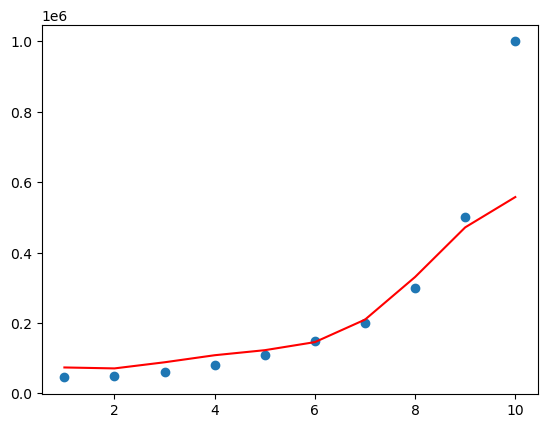

Predicted Salary for Level 7.5: 263740.8532800313
R2 Score: 0.7516001070620797
RMSE: 141550.3241399742


In [36]:
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_scaled, y_scaled.ravel())
scaled_y_pred = svr_regressor.predict(sc_X.transform([[7.5]]))
y_pred = sc_y.inverse_transform(scaled_y_pred.reshape(-1,1))

plt.scatter(X, y)
plt.plot(X, sc_y.inverse_transform(svr_regressor.predict(X_scaled).reshape(-1,1)), color='red')
plt.show()

print(f"Predicted Salary for Level 7.5: {y_pred[0][0]}")
print(f"R2 Score: {r2_score(y, sc_y.inverse_transform(svr_regressor.predict(X_scaled).reshape(-1,1)))}")
print(f"RMSE: {root_mean_squared_error(y, sc_y.inverse_transform(svr_regressor.predict(X_scaled).reshape(-1,1)))}")

Best parameters: {'C': np.float64(51.79474679231202), 'epsilon': np.float64(0.0001)}
Best cross-validation score: 0.13153981428836978


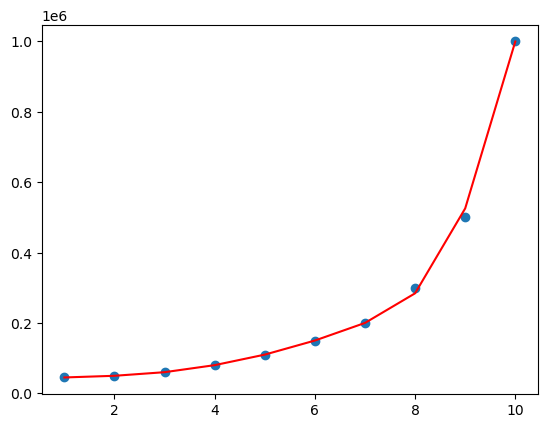

Predicted Salary for Level 7.5: 232592.05063753662
R2 Score: 0.9988809633299174
RMSE: 9500.737636697879


In [37]:
param_grid = {
    'C': np.logspace(-4,4,50),
    'epsilon': np.logspace(-4,4,50)
}

grid_search = GridSearchCV(svr_regressor, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_scaled, y_scaled.ravel())
best_svr_regressor = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)

scaled_y_pred = best_svr_regressor.predict(sc_X.transform([[7.5]]))
y_pred = sc_y.inverse_transform(scaled_y_pred.reshape(-1,1))

plt.scatter(X, y)
plt.plot(X, sc_y.inverse_transform(best_svr_regressor.predict(X_scaled).reshape(-1,1)), color='red')
plt.show()

print(f"Predicted Salary for Level 7.5: {y_pred[0][0]}")
print(f"R2 Score: {r2_score(y, sc_y.inverse_transform(best_svr_regressor.predict(X_scaled).reshape(-1,1)))}")
print(f"RMSE: {root_mean_squared_error(y, sc_y.inverse_transform(best_svr_regressor.predict(X_scaled).reshape(-1,1)))}")